In [1]:
import numpy as np, pandas as pd

In [30]:
# download csv file
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  383k    0  383k    0     0   163k      0 --:--:--  0:00:02 --:--:--  163k
100 2679k    0 2679k    0     0   857k      0 --:--:--  0:00:03 --:--:--  857k


In [39]:
data = pd.read_csv("FremontBridge.csv", index_col="Date", parse_dates=True)
print(data.head(), "\n")

                     Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                                                                      
2012-10-03 00:00:00                  13.0                           4.0   
2012-10-03 01:00:00                  10.0                           4.0   
2012-10-03 02:00:00                   2.0                           1.0   
2012-10-03 03:00:00                   5.0                           2.0   
2012-10-03 04:00:00                   7.0                           6.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2012-10-03 00:00:00                           9.0  
2012-10-03 01:00:00                           6.0  
2012-10-03 02:00:00                           1.0  
2012-10-03 03:00:00                           3.0  
2012-10-03 04:00:00                           1.0   



In [40]:
# rename columns
data.drop(columns="Fremont Bridge Total", inplace=True)
data.columns = ["East", "West"]
data["Total"] = data.eval("East + West") # df.eval(exp)

In [46]:
# 데이터 요약 통계
data.dropna().describe()

,East,West,Total
count,86122.000000,86122.000000,86122.000000
mean,47.996238,58.802211,106.798449
std,61.795993,83.574458,134.926536
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,13.000000
50%,27.000000,30.000000,59.000000
75%,66.000000,75.000000,143.000000
max,698.000000,850.000000,1097.000000


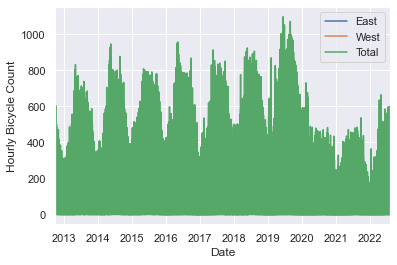

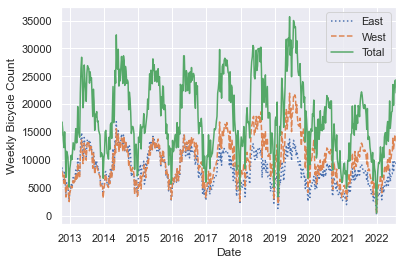

In [51]:
# 데이터 시각화하기
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

data.plot()
plt.ylabel("Hourly Bicycle Count");

# 주 단위 리샘플링
weekly = data.resample("W").sum()
weekly.plot(style=[":", "--", "-"])
plt.ylabel("Weekly Bicycle Count");

<AxesSubplot:xlabel='Date'>

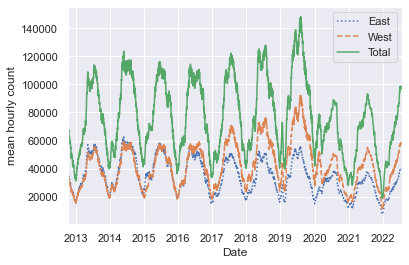

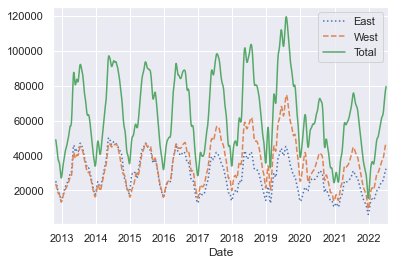

In [59]:
# pd.rolling_mean()
daily = data.resample("D").sum() # daily count
daily.rolling(30, center=True).sum().plot(style=[":","--","-"])
plt.ylabel("mean hourly count");

# 가우스 윈도우
daily.rolling(50, center=True,
              win_type="gaussian").sum(std=10).plot(style=[":","--","-"])

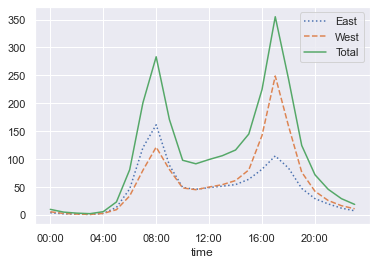

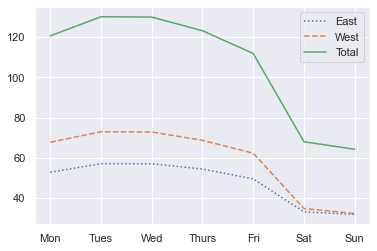

In [70]:
# 데이터 파해쳐 보기
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[":","--","-"]);

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
by_weekday.plot(style=[":","--","-"]);

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

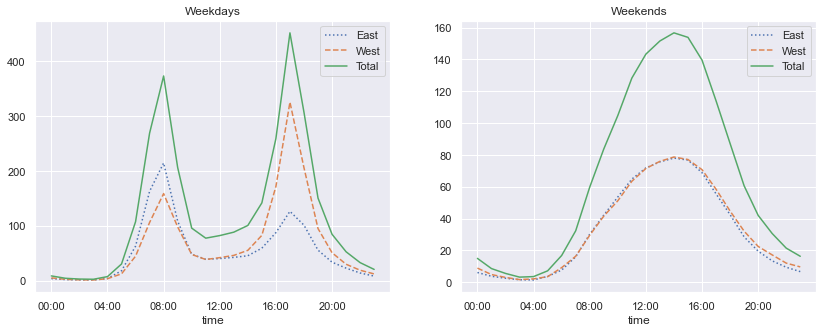

In [77]:
# 주중과 주말의 시간대별 추이
weekend = np.where(data.index.weekday < 5, "Weekday", "Weekend")
by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14,5))
by_time.loc["Weekday"].plot(ax=ax[0], title="Weekdays",
                           xticks=hourly_ticks, style=[":","--","-"])
by_time.loc["Weekend"].plot(ax=ax[1], title="Weekends",
                           xticks=hourly_ticks, style=[":","--","-"])
